In [54]:

import math

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import seaborn as sns 
sns.set()

In [55]:
df = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/lung-volume.csv')
df.head(10)

,group,patient,t1,t2
0,1,1-1,4226,4497
1,1,1-2,5731,5665
2,1,1-3,3912,4505
3,1,1-4,4811,6472
4,1,1-5,5128,4710
5,1,1-6,3669,3116
6,1,1-7,4807,3692
7,1,1-8,7031,6683
8,1,1-9,4136,4442
9,1,1-10,5059,5119


For each group, is there a significant difference between time 1 and time 2?



In [59]:
group1 = df[df['group']==1]
group2 = df[df['group']==2]
group3 = df[df['group']==3]

print(stats.ttest_rel(group1['t1'], group1['t2']))
print(stats.ttest_rel(group2['t1'], group2['t2']))
print(stats.ttest_rel(group3['t1'], group3['t2']))

Ttest_relResult(statistic=-0.31827677584963787, pvalue=0.7506087664956842)
Ttest_relResult(statistic=0.32745622415118286, pvalue=0.7440142766032991)
Ttest_relResult(statistic=0.8984773127301627, pvalue=0.37111115842334486)


There are no differences between time 1 and time 2 in any of the groups

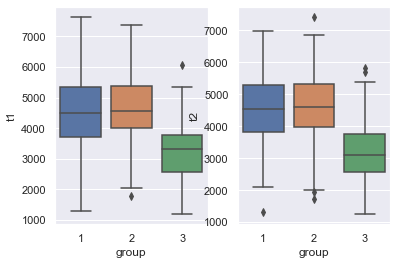

In [43]:
df.groupby('group').mean()
sns.boxplot(x='group', y='t1',data=df)
plt.subplot(121)
sns.boxplot(x='group', y='t1',data=df)
plt.subplot(122)
sns.boxplot(x='group', y='t2',data=df)

There looks to be a significant difference in both time 1 and time 2 between group 3 vs group 1 and group 2

Is there a significant difference in the mean of all groups at time 2?

In [64]:
stats.f_oneway(group1['t2'], group2['t2'], group3['t2'])
tukey = pairwise_tukeyhsd(endog = df['t2'], groups = df['group'], alpha =.05)

tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,99.705,0.6902,-195.9612,395.3712,False
1,3,-1341.865,0.001,-1637.5312,-1046.1988,True
2,3,-1441.57,0.001,-1782.9759,-1100.1641,True


Null hypothesis is rejected for significant differences between 1 and 2 but there are significant differences in time 2 between group 1 and 3 as well as group 2 and 3